# **DATA SCIENCE ITINERARY - IT ACADEMY**

# <center><b><u>Sprint 10. Practitising with training and test sets</u></b><center>

## **DATASET INFORMATION**

+ According to a 2010 report made by the US Federal Aviation Administration, the economic price of domestic flight delays entails a yearly cost of 32.9 billion dollars to passengers, airlines and other parts of the economy. More than half of that amount comes from the pockets of passengers who not only lose time waiting for their planes to leave, but they also miss connecting flights, spend money on food and have to sleep on hotel rooms while they're stranded.

+ The report, focusing on data from year 2007, estimated that air transportation delays put a 4 billion dollar dent in the country's gross domestic product that year The data comes from the U.S. Department of Transportation's (DOT) Bureau of Transportation Statistics (BTS). 

_**But, what are the causes for these delays?**_

 + In order to answer this question, we are going to analyze the provided dataset, containing up to 1.936.758 different internal flights in the US for 2008 and their causes for delay, diversion and cancellation; if any.
-----------



+ **Year** 2008
+ **Month** 1-12
+ **DayOfMonth** 1-31
+ **DayOfWeek** 1 (Monday) - 7 (Sunday)
+ **DepTime** actual departure time (local, hhmm)
+ **CRSDepTime** scheduled departure time (local, hhmm)
+ **ArrTime** actual arrival time (local, hhmm)
+ **CRSArrTime** scheduled arrival time (local, hhmm)
+ **UniqueCarrier** unique carrier code
+ **FlightNum** flight number
+ **TailNum** plane tail number: aircraft registration, unique aircraft identifier
+ **ActualElapsedTime** in minutes
+ **CRSElapsedTime** in minutes
+ **AirTime** in minutes
+ **ArrDelay** arrival delay, in minutes: A flight is counted as "on time" if it operated less than 15 minutes later the scheduled time shown in the carriers' Computerized Reservations Systems (CRS).
+ **DepDelay** departure delay, in minutes
+ **Origin** origin IATA airport code
+ **Dest** destination IATA airport code
+ **Distance** in miles
+ **TaxiIn** taxi in time, in minutes
+ **TaxiOut** taxi out time in minutes
+ **Cancelled** was the flight cancelled
+ **CancellationCode** reason for cancellation (A = carrier, B = weather, C = NAS, D = security)
+ **Diverted** 1 = yes, 0 = no
+ **CarrierDelay** in minutes: Carrier delay is within the control of the air carrier. Examples of occurrences that may determine carrier delay are: aircraft cleaning, aircraft damage, awaiting the arrival of connecting passengers or crew, baggage, bird strike, cargo loading, catering, computer, outage-carrier equipment, crew legality (pilot or attendant rest), damage by hazardous goods, engineering inspection, fueling, handling disabled passengers, late crew, lavatory servicing, maintenance, oversales, potable water servicing, removal of unruly passenger, slow boarding or seating, stowing carry-on baggage, weight and balance delays.
+ **WeatherDelay** in minutes: Weather delay is caused by extreme or hazardous weather conditions that are forecasted or manifest themselves on point of departure, enroute, or on point of arrival.
+ **NASDelay** in minutes: Delay that is within the control of the National Airspace System (NAS) may include: non-extreme weather conditions, airport operations, heavy traffic volume, air traffic control, etc.
+ **SecurityDelay** in minutes: Security delay is caused by evacuation of a terminal or concourse, re-boarding of aircraft because of security breach, inoperative screening equipment and/or long lines in excess of 29 minutes at screening areas.
+ **LateAircraftDelay** in minutes: Arrival delay at an airport due to the late arrival of the same aircraft at a previous airport. The ripple effect of an earlier delay at downstream airports is referred to as delay propagation.

In [51]:
# Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import time
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OrdinalEncoder

In [3]:
airlines = pd.read_csv('/Users/adrianova/Desktop/Data Science/Python/IT Academy - Python/SPRINT 10 - Aprenentatge Supervisat - Regressions/Practise/DelayedFlights.csv')
pd.set_option('display.max_columns', None)
airlines = airlines.drop(['Unnamed: 0','TailNum','TaxiIn','TaxiOut','CancellationCode'], axis = 1)
airlines.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,Cancelled,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,335,128.0,150.0,116.0,-14.0,8.0,IAD,TPA,810,0,0,NaN,NaN,NaN,NaN,NaN
1,2008,1,3,4,754.0,735,1002.0,1000,WN,3231,128.0,145.0,113.0,2.0,19.0,IAD,TPA,810,0,0,NaN,NaN,NaN,NaN,NaN
2,2008,1,3,4,628.0,620,804.0,750,WN,448,96.0,90.0,76.0,14.0,8.0,IND,BWI,515,0,0,NaN,NaN,NaN,NaN,NaN
3,2008,1,3,4,1829.0,1755,1959.0,1925,WN,3920,90.0,90.0,77.0,34.0,34.0,IND,BWI,515,0,0,2.0,0.0,0.0,0.0,32.0
4,2008,1,3,4,1940.0,1915,2121.0,2110,WN,378,101.0,115.0,87.0,11.0,25.0,IND,JAX,688,0,0,NaN,NaN,NaN,NaN,NaN


# **Clean Dataset**

In [4]:
# Create a copy of the original dataset
clean_airlines_df = airlines.copy()
clean_airlines_df.head(3)

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,Cancelled,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,335,128.0,150.0,116.0,-14.0,8.0,IAD,TPA,810,0,0,NaN,NaN,NaN,NaN,NaN
1,2008,1,3,4,754.0,735,1002.0,1000,WN,3231,128.0,145.0,113.0,2.0,19.0,IAD,TPA,810,0,0,NaN,NaN,NaN,NaN,NaN
2,2008,1,3,4,628.0,620,804.0,750,WN,448,96.0,90.0,76.0,14.0,8.0,IND,BWI,515,0,0,NaN,NaN,NaN,NaN,NaN


In [5]:
# Types of variables
clean_airlines_df.dtypes

Year                   int64
Month                  int64
DayofMonth             int64
DayOfWeek              int64
DepTime              float64
CRSDepTime             int64
ArrTime              float64
CRSArrTime             int64
UniqueCarrier         object
FlightNum              int64
ActualElapsedTime    float64
CRSElapsedTime       float64
AirTime              float64
ArrDelay             float64
DepDelay             float64
Origin                object
Dest                  object
Distance               int64
Cancelled              int64
Diverted               int64
CarrierDelay         float64
WeatherDelay         float64
NASDelay             float64
SecurityDelay        float64
LateAircraftDelay    float64
dtype: object

### **Categorical Features**

+ We have 5 categorical variables treated as object when they are categories. Let's see this categories deeply

In [6]:
# UniqueCarrier. 20 different unique carrier code
clean_airlines_df['UniqueCarrier'].value_counts().head()

WN    377602
AA    191865
MQ    141920
UA    141426
OO    132433
Name: UniqueCarrier, dtype: int64

In [7]:
# Origin. 303 different IATA airport codes
clean_airlines_df['Origin'].value_counts().head()

ATL    131613
ORD    125979
DFW     95414
DEN     74323
LAX     58772
Name: Origin, dtype: int64

In [8]:
# Destination. 304 different IATA airport codes
clean_airlines_df['Dest'].value_counts().head()

ORD    108984
ATL    106898
DFW     70657
DEN     63003
LAX     59969
Name: Dest, dtype: int64

In [9]:
# Diverted. 1 if the flight is diverted, 0 on the contrary
round(clean_airlines_df['Diverted'].value_counts(normalize=True),3)

0    0.996
1    0.004
Name: Diverted, dtype: float64

In [10]:
# Cancelled. 1 if the flight is cancelled, 0 on the contrary
round(clean_airlines_df['Cancelled'].value_counts(normalize=True),4)

0    0.9997
1    0.0003
Name: Cancelled, dtype: float64

In [11]:
# Convert object variables in categories
clean_airlines_df[['UniqueCarrier','Origin','Dest','Diverted','Cancelled']] = clean_airlines_df[['UniqueCarrier','Origin','Dest','Diverted','Cancelled']].astype('category')

### **Numerical Features**

+ We have some numerical variables treated as float variables and our work can be simplified if we convert this variables to integer.

In [12]:
# We have converted delays into integer and filled Nans by 0
clean_airlines_df[['CarrierDelay','WeatherDelay','NASDelay','SecurityDelay','LateAircraftDelay']] = clean_airlines_df[['CarrierDelay','WeatherDelay','NASDelay','SecurityDelay','LateAircraftDelay']].fillna(0).astype(int)
clean_airlines_df.tail()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,Cancelled,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
1936753,2008,12,13,6,1250.0,1220,1617.0,1552,DL,1621,147.0,152.0,120.0,25.0,30.0,MSP,ATL,906,0,0,3,0,0,0,22
1936754,2008,12,13,6,657.0,600,904.0,749,DL,1631,127.0,109.0,78.0,75.0,57.0,RIC,ATL,481,0,0,0,57,18,0,0
1936755,2008,12,13,6,1007.0,847,1149.0,1010,DL,1631,162.0,143.0,122.0,99.0,80.0,ATL,IAH,689,0,0,1,0,19,0,79
1936756,2008,12,13,6,1251.0,1240,1446.0,1437,DL,1639,115.0,117.0,89.0,9.0,11.0,IAD,ATL,533,0,0,0,0,0,0,0
1936757,2008,12,13,6,1110.0,1103,1413.0,1418,DL,1641,123.0,135.0,104.0,-5.0,7.0,SAT,ATL,874,0,0,0,0,0,0,0


In [13]:
# Convert float variables to integer
clean_airlines_df = clean_airlines_df.astype({
    'DepTime': pd.Int64Dtype(),
    'ArrTime': pd.Int64Dtype(),
    'ActualElapsedTime': pd.Int64Dtype(),
    'CRSElapsedTime': pd.Int64Dtype(),
    'AirTime': pd.Int64Dtype(),
    'ArrDelay': pd.Int64Dtype(),
    'DepDelay': pd.Int64Dtype(),
})
clean_airlines_df.head(3)

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,Cancelled,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2008,1,3,4,2003,1955,2211,2225,WN,335,128,150,116,-14,8,IAD,TPA,810,0,0,0,0,0,0,0
1,2008,1,3,4,754,735,1002,1000,WN,3231,128,145,113,2,19,IAD,TPA,810,0,0,0,0,0,0,0
2,2008,1,3,4,628,620,804,750,WN,448,96,90,76,14,8,IND,BWI,515,0,0,0,0,0,0,0


In [14]:
# Renewed data types
clean_airlines_df.dtypes

Year                    int64
Month                   int64
DayofMonth              int64
DayOfWeek               int64
DepTime                 Int64
CRSDepTime              int64
ArrTime                 Int64
CRSArrTime              int64
UniqueCarrier        category
FlightNum               int64
ActualElapsedTime       Int64
CRSElapsedTime          Int64
AirTime                 Int64
ArrDelay                Int64
DepDelay                Int64
Origin               category
Dest                 category
Distance                int64
Cancelled            category
Diverted             category
CarrierDelay            int64
WeatherDelay            int64
NASDelay                int64
SecurityDelay           int64
LateAircraftDelay       int64
dtype: object

### **Missings**

In [15]:
# Missings
clean_airlines_df.isna().sum()

Year                    0
Month                   0
DayofMonth              0
DayOfWeek               0
DepTime                 0
CRSDepTime              0
ArrTime              7110
CRSArrTime              0
UniqueCarrier           0
FlightNum               0
ActualElapsedTime    8387
CRSElapsedTime        198
AirTime              8387
ArrDelay             8387
DepDelay                0
Origin                  0
Dest                    0
Distance                0
Cancelled               0
Diverted                0
CarrierDelay            0
WeatherDelay            0
NASDelay                0
SecurityDelay           0
LateAircraftDelay       0
dtype: int64

+ The cancelled and diverted flights are the missings of the variables 'ActualElapsedTime', 'AirTime', 'ArrDelay' and 'ArrTime'

In [16]:
print(clean_airlines_df.Cancelled.value_counts(),'\n', clean_airlines_df.Diverted.value_counts())

0    1936125
1        633
Name: Cancelled, dtype: int64 
 0    1929004
1       7754
Name: Diverted, dtype: int64


+ The variables that have missings do not reach 1% of the data set, therefore we want to keep this columns because they are a consequence of cancelled and diverted flights.

### **Convert Data Columns to Date**

In [17]:
clean_airlines_df.head(2)

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,Cancelled,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2008,1,3,4,2003,1955,2211,2225,WN,335,128,150,116,-14,8,IAD,TPA,810,0,0,0,0,0,0,0
1,2008,1,3,4,754,735,1002,1000,WN,3231,128,145,113,2,19,IAD,TPA,810,0,0,0,0,0,0,0


In [18]:
# Convert 'Year', 'Month' and 'DayofMonth' columns to 'Date'

date = clean_airlines_df.rename(columns={'DayofMonth':'Day'}) # change the name of the colum 
date = date[['Year','Month','Day']] # Create a small dataset only with the important columns for the date
clean_airlines_df['FlightDate_USA'] = pd.to_datetime(date)
clean_airlines_df.head(3)

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,Cancelled,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,FlightDate_USA
0,2008,1,3,4,2003,1955,2211,2225,WN,335,128,150,116,-14,8,IAD,TPA,810,0,0,0,0,0,0,0,2008-01-03
1,2008,1,3,4,754,735,1002,1000,WN,3231,128,145,113,2,19,IAD,TPA,810,0,0,0,0,0,0,0,2008-01-03
2,2008,1,3,4,628,620,804,750,WN,448,96,90,76,14,8,IND,BWI,515,0,0,0,0,0,0,0,2008-01-03


### **Reordering the columns**


In [19]:
# Columns' Roerder 
clean_airlines_df = clean_airlines_df.reindex(columns = ['FlightDate_USA','UniqueCarrier','Origin','Dest','Cancelled','Diverted','DepTime','CRSDepTime'
,'ArrTime','CRSArrTime','FlightNum','ActualElapsedTime','CRSElapsedTime','AirTime','ArrDelay','DepDelay','Distance','CarrierDelay','WeatherDelay'
,'NASDelay','SecurityDelay','LateAircraftDelay'])

clean_airlines_df.head(2)

,FlightDate_USA,UniqueCarrier,Origin,Dest,Cancelled,Diverted,DepTime,CRSDepTime,ArrTime,CRSArrTime,FlightNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Distance,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2008-01-03,WN,IAD,TPA,0,0,2003,1955,2211,2225,335,128,150,116,-14,8,810,0,0,0,0,0
1,2008-01-03,WN,IAD,TPA,0,0,754,735,1002,1000,3231,128,145,113,2,19,810,0,0,0,0,0


### **Save dataset cleaned**

In [20]:
# Save dataset
clean_airlines_df.to_csv('clean_airlines_df.csv')

## **EXERCISE 1**

**STATEMENT** Split the Delayed Flights.csv dataset into train and test. Study the two sets separately, at a descriptive level.

In [21]:
airlines_df = clean_airlines_df.copy()
airlines_df.head()

,FlightDate_USA,UniqueCarrier,Origin,Dest,Cancelled,Diverted,DepTime,CRSDepTime,ArrTime,CRSArrTime,FlightNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Distance,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2008-01-03,WN,IAD,TPA,0,0,2003,1955,2211,2225,335,128,150,116,-14,8,810,0,0,0,0,0
1,2008-01-03,WN,IAD,TPA,0,0,754,735,1002,1000,3231,128,145,113,2,19,810,0,0,0,0,0
2,2008-01-03,WN,IND,BWI,0,0,628,620,804,750,448,96,90,76,14,8,515,0,0,0,0,0
3,2008-01-03,WN,IND,BWI,0,0,1829,1755,1959,1925,3920,90,90,77,34,34,515,2,0,0,0,32
4,2008-01-03,WN,IND,JAX,0,0,1940,1915,2121,2110,378,101,115,87,11,25,688,0,0,0,0,0


In [22]:
# Shape. 1.936.785 rows and 22 columns
airlines_df.shape

(1936758, 22)

In [23]:
# Train and split function
train, test = train_test_split(airlines_df, train_size= 0.8, random_state=1)

In [24]:
# Check the correct split
print('TRAIN SPLIT: ', round(len(train)/len(airlines_df),2))
print('TEST SPLIT: ', round(len(test)/len(airlines_df),2))

TRAIN SPLIT:  0.8
TEST SPLIT:  0.2


In [25]:
# shape
print(train.shape)
print(test.shape)

(1549406, 22)
(387352, 22)


#### **Descriptive Analysis**

+ We are going to analyze the training set and test set separately to see what differences/coincidences we find between them.

In [26]:
# Describe (train)
a = round(train.describe(),2)
a

,DepTime,CRSDepTime,ArrTime,CRSArrTime,FlightNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Distance,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
count,1549406.00,1549406.00,1543751.00,1549406.00,1549406.00,1542731.00,1549248.00,1542731.00,1542731.00,1549406.00,1549406.00,1549406.00,1549406.00,1549406.00,1549406.00,1549406.00
mean,1518.45,1467.41,1609.81,1634.03,2184.65,133.32,134.30,108.28,42.20,43.17,765.67,12.34,2.39,9.68,0.06,16.30
std,450.55,424.80,548.45,464.88,1944.82,72.05,71.32,68.63,56.74,53.35,574.31,36.07,17.38,28.12,1.63,35.79
min,1.00,0.00,1.00,0.00,1.00,14.00,-25.00,0.00,-109.00,6.00,11.00,0.00,0.00,0.00,0.00,0.00
25%,1203.00,1135.00,1316.00,1325.00,610.00,80.00,82.00,58.00,9.00,12.00,338.00,0.00,0.00,0.00,0.00,0.00
50%,1545.00,1510.00,1715.00,1705.00,1543.00,116.00,116.00,90.00,24.00,24.00,606.00,0.00,0.00,0.00,0.00,0.00
75%,1900.00,1815.00,2030.00,2014.00,3424.00,165.00,165.00,137.00,56.00,53.00,998.00,9.00,0.00,6.00,0.00,18.00
max,2400.00,2359.00,2400.00,2400.00,9742.00,776.00,660.00,664.00,2461.00,2467.00,4962.00,2436.00,1352.00,1357.00,392.00,1254.00


In [27]:
# Describe (test)
b = round(test.describe(),2)
b

,DepTime,CRSDepTime,ArrTime,CRSArrTime,FlightNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Distance,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
count,387352.00,387352.00,385897.00,387352.00,387352.00,385640.00,387312.00,385640.00,385640.00,387352.00,387352.00,387352.00,387352.00,387352.00,387352.00,387352.00
mean,1518.85,1467.73,1611.45,1635.02,2182.71,133.26,134.32,108.27,42.19,43.23,765.74,12.40,2.36,9.65,0.06,16.27
std,450.24,424.62,547.08,463.67,1944.25,72.09,71.42,68.71,56.96,53.60,575.15,36.41,17.19,27.96,1.59,36.13
min,1.00,1.00,1.00,0.00,1.00,17.00,-21.00,2.00,-68.00,6.00,24.00,0.00,0.00,0.00,0.00,0.00
25%,1204.00,1135.00,1317.00,1325.00,611.00,80.00,82.00,58.00,9.00,12.00,338.00,0.00,0.00,0.00,0.00,0.00
50%,1546.00,1510.00,1716.00,1706.00,1542.00,116.00,116.00,90.00,24.00,24.00,606.00,0.00,0.00,0.00,0.00,0.00
75%,1900.00,1815.00,2031.00,2015.00,3415.00,165.00,165.00,137.00,56.00,53.00,998.00,10.00,0.00,6.00,0.00,18.00
max,2400.00,2359.00,2400.00,2400.00,9741.00,1114.00,660.00,1091.00,1951.00,1952.00,4962.00,1951.00,1070.00,768.00,229.00,1316.00


In [28]:
# Show the differences of summary statistics between training and test set
c = a-b
c

,DepTime,CRSDepTime,ArrTime,CRSArrTime,FlightNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Distance,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
count,1162054.00,1162054.00,1157854.00,1162054.00,1162054.00,1157091.00,1161936.00,1157091.00,1157091.00,1162054.00,1162054.00,1162054.00,1162054.00,1162054.00,1162054.00,1162054.00
mean,-0.40,-0.32,-1.64,-0.99,1.94,0.06,-0.02,0.01,0.01,-0.06,-0.07,-0.06,0.03,0.03,0.00,0.03
std,0.31,0.18,1.37,1.21,0.57,-0.04,-0.10,-0.08,-0.22,-0.25,-0.84,-0.34,0.19,0.16,0.04,-0.34
min,0.00,-1.00,0.00,0.00,0.00,-3.00,-4.00,-2.00,-41.00,0.00,-13.00,0.00,0.00,0.00,0.00,0.00
25%,-1.00,0.00,-1.00,0.00,-1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,-1.00,0.00,-1.00,-1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
75%,0.00,0.00,-1.00,-1.00,9.00,0.00,0.00,0.00,0.00,0.00,0.00,-1.00,0.00,0.00,0.00,0.00
max,0.00,0.00,0.00,0.00,1.00,-338.00,0.00,-427.00,510.00,515.00,0.00,485.00,282.00,589.00,163.00,-62.00


+ We can observe that the differences between the means and standard deviation of the train and test set are very small, while there is a larger difference betweeen the minimum and maximum value of each set due to possible outliers.

##### **Categorical Distributions**

+ We want to show the categorical distributions of the **original**, **train** and **test** set. Then we want to study the differences between sets.

In [29]:
# Categorical Variables

labels = ['UniqueCarrier','Origin','Dest']
categorical_columns = airlines_df[labels]
categorical_columns.head(5)

,UniqueCarrier,Origin,Dest
0,WN,IAD,TPA
1,WN,IAD,TPA
2,WN,IND,BWI
3,WN,IND,BWI
4,WN,IND,JAX


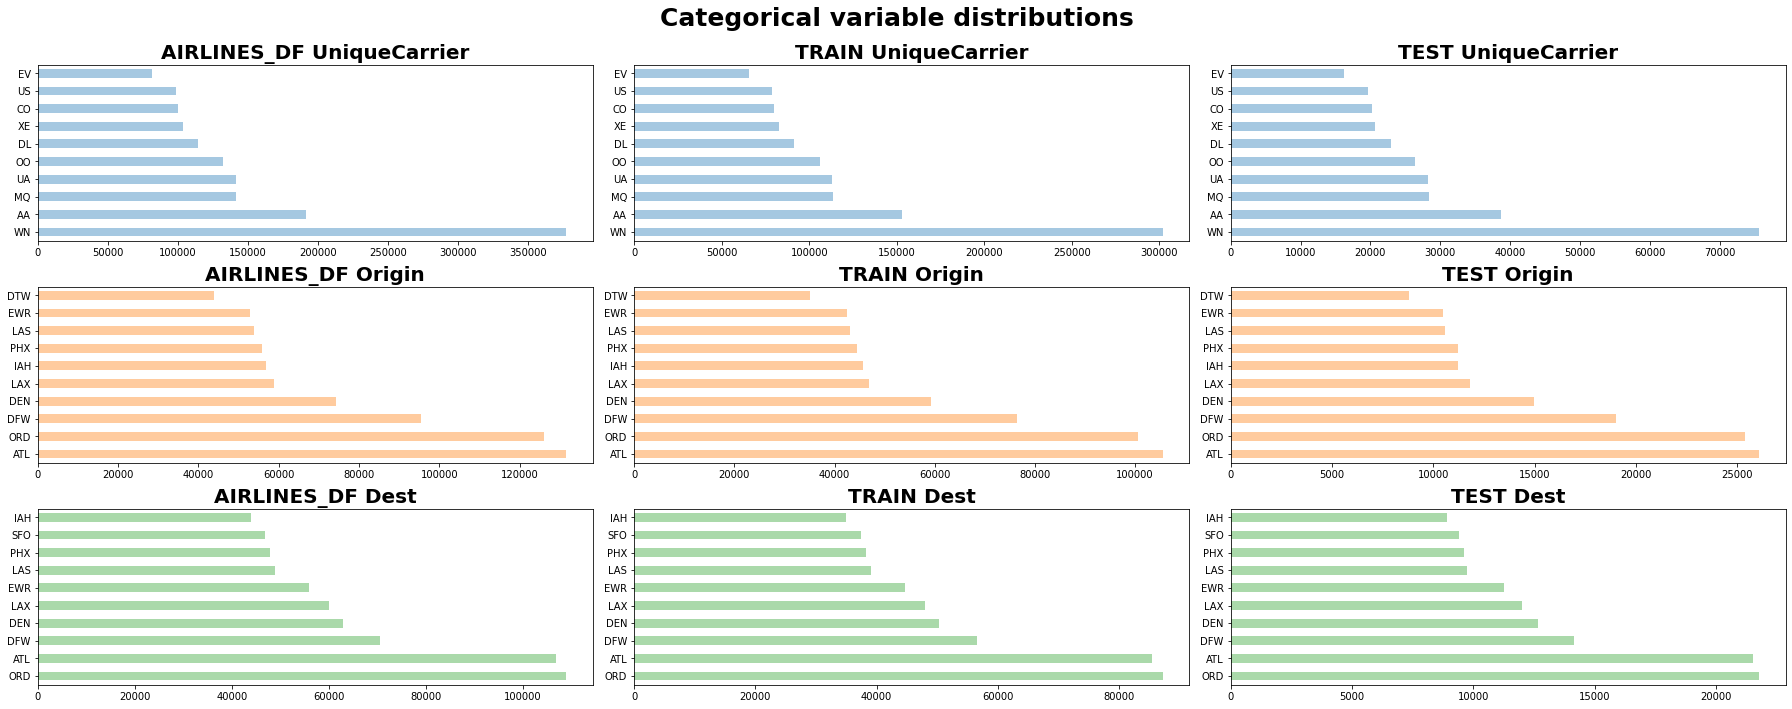

In [30]:
# Categorical Distributions

# Framework
fig, ax = plt.subplots(ncols=len([airlines_df, train, test]), nrows=len(categorical_columns.columns), figsize = (25,10))

for i, datasets in enumerate([airlines_df, train, test]):
    title = "AIRLINES_DF " if datasets is airlines_df else "TRAIN " if datasets is train else "TEST " 
    
    for j, column in enumerate(categorical_columns):
        color = (list(plt.rcParams['axes.prop_cycle'])*3)[j]["color"]
        datasets[column].value_counts().sort_values(ascending = False).head(10).plot.barh(color = color, ax = ax[j][i], alpha = 0.4)
        ax[j][i].set_title(title + column, fontsize = 20, fontweight = 'bold')
        ax[j][i].tick_params(labelsize = 10)
        ax[j][i].set_xlabel('')

fig.tight_layout()
plt.subplots_adjust(top = 0.9)
fig.suptitle('Categorical variable distributions', fontsize = 25, fontweight = 'bold')
plt.show()
       

**OBSERVATIONS** We can observe for the 3 categorical variables of our model (UniqueCarrier, Origin and Destination) how the same categories maintain the same positions but with different weights, since when dividing the dataset into train and test the number of observations is affected.

+ The UniqueCarriers with the most flights in 2008 are:

  + WN
  + AA
  + MQ
        
+ The airports with the most 'ORIGEN' flights in 2008 are:

  + ATL
  + ORD
  + DFW

+ The airports with the most 'DESTINATION' flights in 2008 are:

  + ORD
  + ATL
  + DFW

##### **Dichotomic Distributions**

+ We want to show the dichotomic distributions of the **original**, **train** and **test** set. Then we want to study the differences between sets.

In [31]:
# Dichotomic Variables

labels = ['Cancelled','Diverted']
dichotomic_columns = airlines_df[labels]
dichotomic_columns.head()

,Cancelled,Diverted
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0


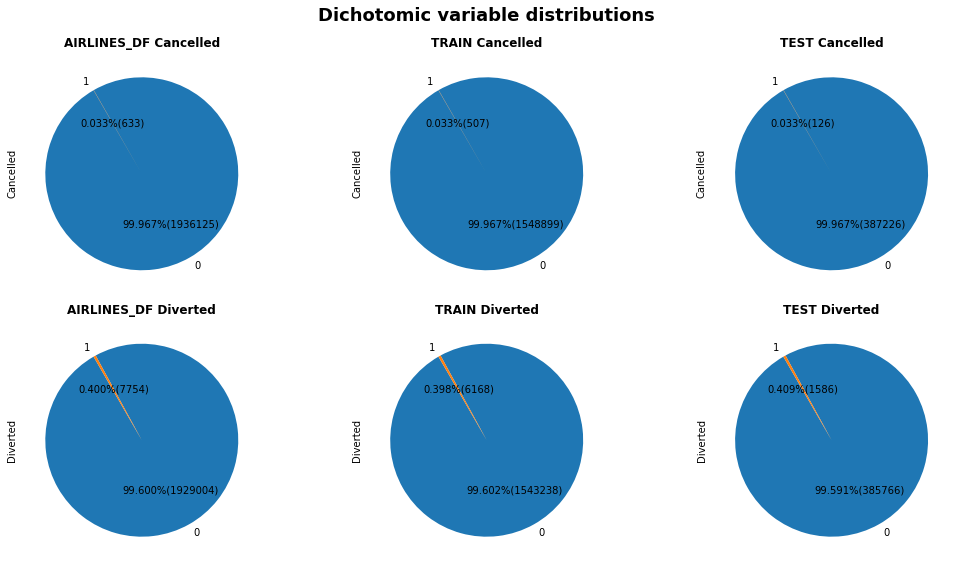

In [32]:
# Dicothomic Distributions

# Framework
fig, ax = plt.subplots(ncols=len([airlines_df, train, test]), nrows=len(dichotomic_columns.columns), figsize = (15,8))

for i, datasets in enumerate([airlines_df, train, test]):
    title = "AIRLINES_DF " if datasets is airlines_df else "TRAIN " if datasets is train else "TEST " 
    
    for j, column in enumerate(dichotomic_columns):
        datasets[column].value_counts().plot.pie( autopct=lambda p:'{:.3f}%({:.0f})'.format(p,(p/100)*len(datasets[column])), startangle = 120,ax = ax[j][i])
        ax[j][i].set_title(title + column, fontsize = 12, fontweight = 'bold')


fig.tight_layout()
plt.subplots_adjust(top = 0.9)
fig.suptitle('Dichotomic variable distributions', fontsize = 18, fontweight = 'bold')
plt.show()
       

**OBSERVATIONS** We can see how the percentage of canceled flights remains the same in the three distributions. On the other hand, for the diverted flights we see that they are not distributed exactly like the canceled flights. This is due to the quantity, since there are more flights diverted than canceled and therefore a greater possibility of having different distributions when we divide the dataset.

##### **Numerical Distributions**

+ We want to show the numerical distributions of the **original**, **train** and **test** set. Then we want to study the differences between sets.

In [33]:
# Numerical Variables

numerical_columns = airlines_df.select_dtypes(include=['int64']) # other way to select variables in a dataset
numerical_columns.head()

,DepTime,CRSDepTime,ArrTime,CRSArrTime,FlightNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Distance,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2003,1955,2211,2225,335,128,150,116,-14,8,810,0,0,0,0,0
1,754,735,1002,1000,3231,128,145,113,2,19,810,0,0,0,0,0
2,628,620,804,750,448,96,90,76,14,8,515,0,0,0,0,0
3,1829,1755,1959,1925,3920,90,90,77,34,34,515,2,0,0,0,32
4,1940,1915,2121,2110,378,101,115,87,11,25,688,0,0,0,0,0


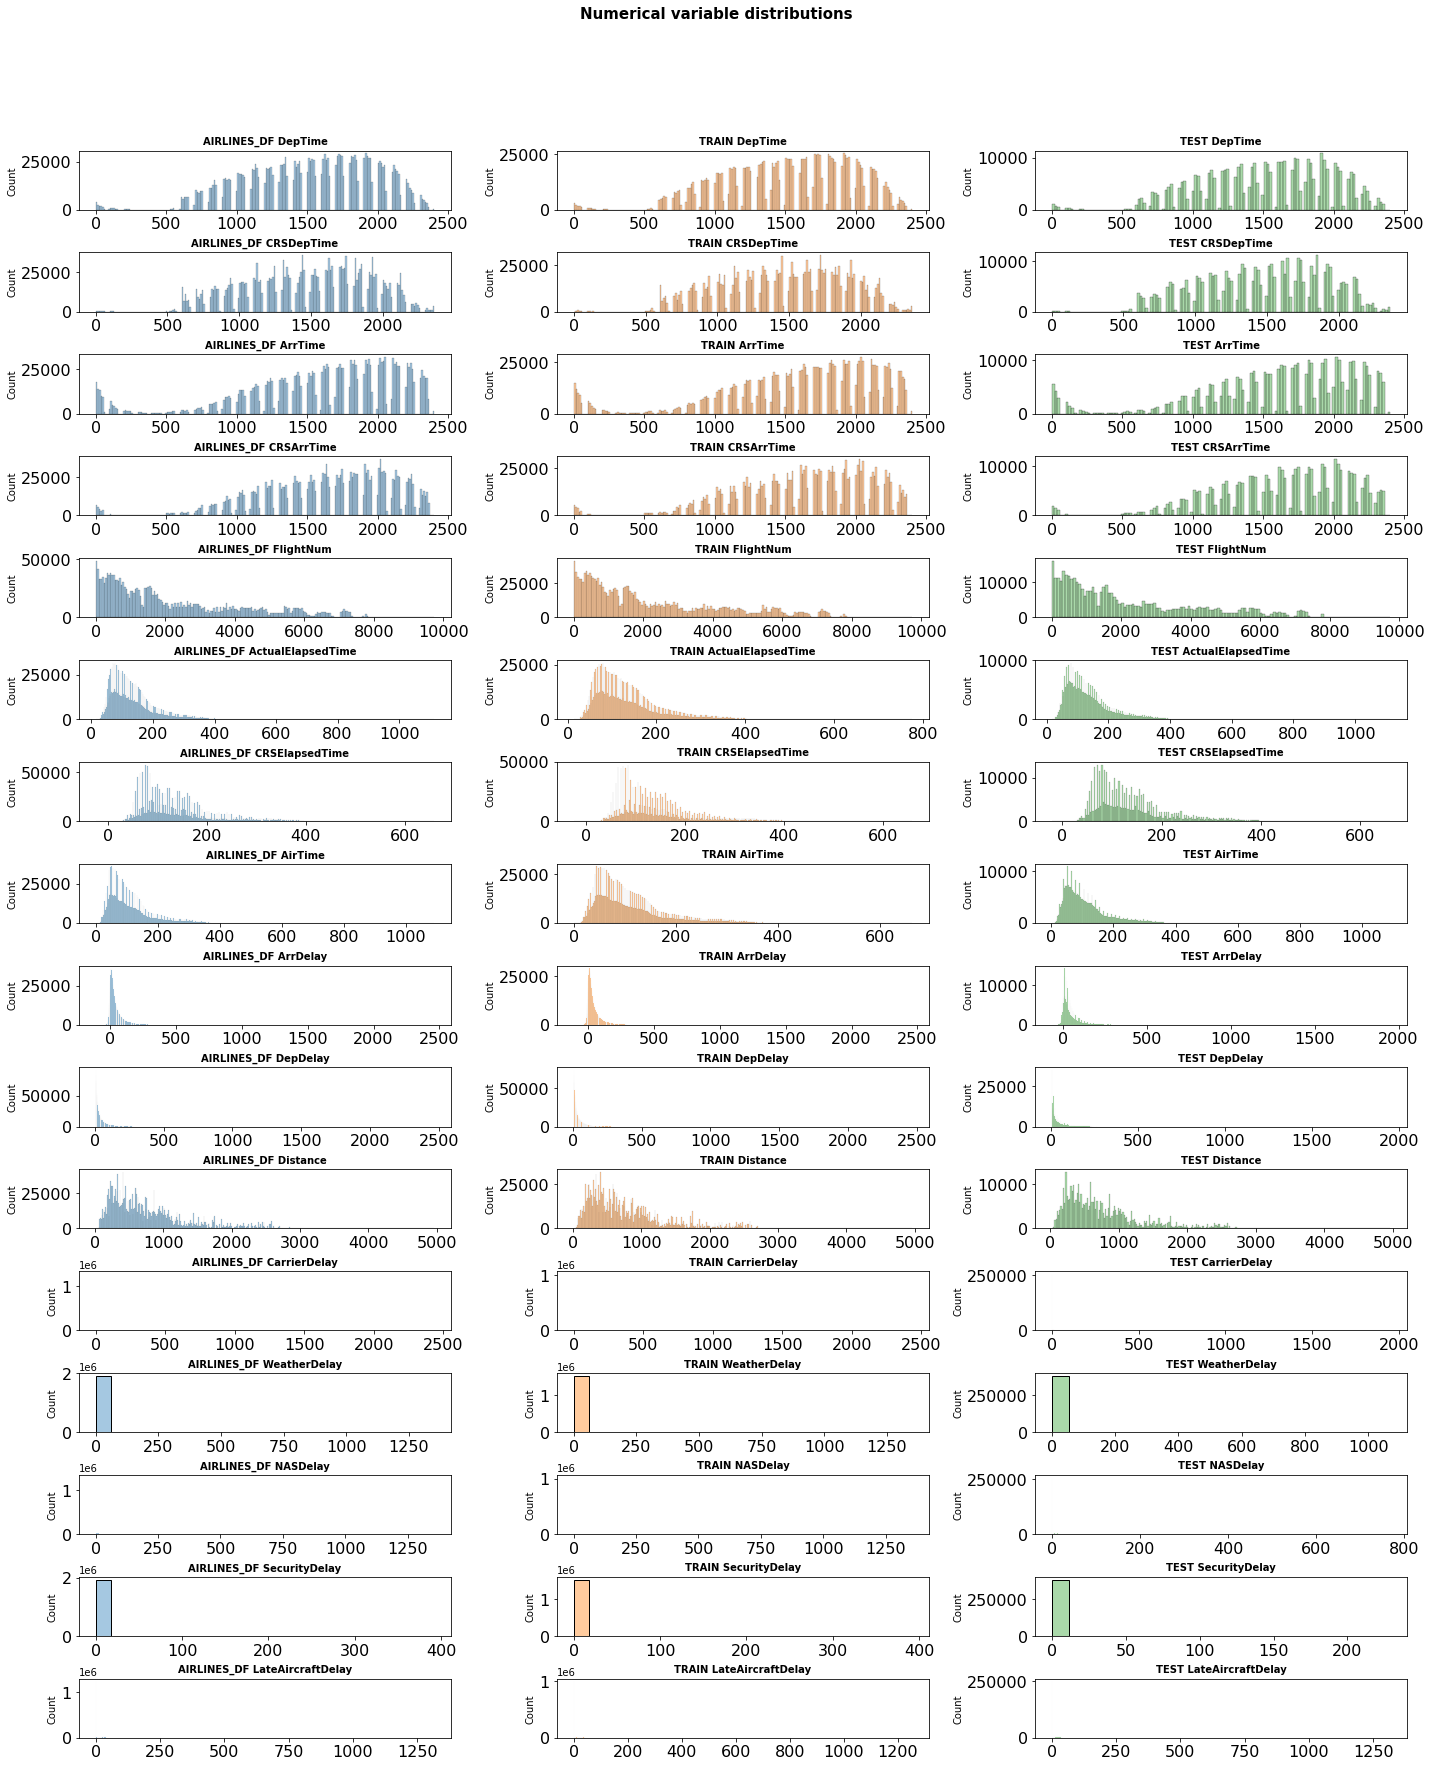

In [34]:
# Numerical Distributions

fig, ax = plt.subplots(ncols=len([airlines_df, train, test]), nrows=len(numerical_columns.columns), figsize = (20,25))

for i, datasets in enumerate([airlines_df, train, test]):
    title = "AIRLINES_DF " if datasets is airlines_df else "TRAIN " if datasets is train else "TEST " 

    for j, column in enumerate(numerical_columns):
        sns.histplot(
            data = datasets,
            x = column,
            stat = 'count',
            color= (list(plt.rcParams['axes.prop_cycle'])*2)[i]["color"],
            line_kws= {'linewidth': 2},
            alpha   = 0.4,
            ax = ax[j][i]
        )
        ax[j][i].set_title(title + column, fontsize = 10, fontweight = 'bold')
        ax[j][i].tick_params(labelsize = 16)
        ax[j][i].set_xlabel("")

fig.tight_layout()
plt.subplots_adjust(top = 0.9)
fig.suptitle('Numerical variable distributions', fontsize = 15, fontweight = 'bold')
plt.show()

**OBSERVATIONS:** We have plotted all the numeric variables depending on the original train or test dataset. We can conclude that all sets follow an identical distribution and it is important when modeling and fitting models that the data represents the original set.

## **Exercise 2**

**STATEMENT:** Apply some transformation process (standardize numerical data, create dummy columns, polynomials...).

ESTANDARIZAR/NORMALIZAR EL DATASET



In [35]:
airlines_df.head(2)

,FlightDate_USA,UniqueCarrier,Origin,Dest,Cancelled,Diverted,DepTime,CRSDepTime,ArrTime,CRSArrTime,FlightNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Distance,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2008-01-03,WN,IAD,TPA,0,0,2003,1955,2211,2225,335,128,150,116,-14,8,810,0,0,0,0,0
1,2008-01-03,WN,IAD,TPA,0,0,754,735,1002,1000,3231,128,145,113,2,19,810,0,0,0,0,0


### **FEATURE ENGINEERING**

#### **MISSINGS**

+ We can see that the missings in the variables correspond to the sum of the canceled and diverted flights. In addition, these data do not represent even 1% of the dataset, so we proceed to eliminate them. The objective of this notebook is not to carry out an exhaustive study of the variables 'cancelled' and 'diverted', so we proceed to leave them out of the dataset.

In [36]:
# Missings
round(airlines_df.isna().sum()/(len(airlines_df)),4)*100

FlightDate_USA       0.00
UniqueCarrier        0.00
Origin               0.00
Dest                 0.00
Cancelled            0.00
Diverted             0.00
DepTime              0.00
CRSDepTime           0.00
ArrTime              0.37
CRSArrTime           0.00
FlightNum            0.00
ActualElapsedTime    0.43
CRSElapsedTime       0.01
AirTime              0.43
ArrDelay             0.43
DepDelay             0.00
Distance             0.00
CarrierDelay         0.00
WeatherDelay         0.00
NASDelay             0.00
SecurityDelay        0.00
LateAircraftDelay    0.00
dtype: float64

In [37]:
# Eliminate missing values
airlines_df = airlines_df.dropna()

At the same time we can eliminate the columns of canceled and diverted flights, since they do not provide knowledge once we have eliminated the 1.

In [38]:
airlines_df = airlines_df.drop(['Cancelled','Diverted'], axis = 1)

#### **DATETIME**

+ There are 4 variables that the data is treated as integers when in reality they are data that correspond to the **time of arrival/departure** and **time of actual arrival/actual departure** of the planes, for this reason we are going to convert them to hours.

In [39]:
# Function that converts integers to time
def Time(time_col):
    if pd.isnull(time_col):
        return np.nan
    else:
        time_string = str(int(time_col)) # Convert int to string
        hour = time_string[:-2] # The last two characters are minutes
        if hour == '':
            hour = '0'
        elif hour == '24':
            hour = '00'
        minute = time_string[-2:] 
        return time(int(hour), int(minute))

# Select the columns of interest
datetime_cols = ['DepTime','CRSDepTime','ArrTime','CRSArrTime']

# We create a loop to convert all observations in each column to time
for dataset in ([airlines_df]):
    for i,column in enumerate(datetime_cols):
        dataset[column] = dataset[column].apply(Time)

In [40]:
airlines_df.head(2)

,FlightDate_USA,UniqueCarrier,Origin,Dest,DepTime,CRSDepTime,ArrTime,CRSArrTime,FlightNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Distance,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2008-01-03,WN,IAD,TPA,20:03:00,19:55:00,22:11:00,22:25:00,335,128,150,116,-14,8,810,0,0,0,0,0
1,2008-01-03,WN,IAD,TPA,07:54:00,07:35:00,10:02:00,10:00:00,3231,128,145,113,2,19,810,0,0,0,0,0


#### **DUMMIES**

+ Our categorical variable of interest to convert to Dummies is UniqueCarrier. Despite the fact that there are 20 different UniqueCarriers, it will allow us to see each observation to which UniqueCarrier belongs from values 1 or 0, in the contrary.

In [41]:
# Dummies
dummies = pd.get_dummies(airlines.UniqueCarrier)
dummies.head()

,9E,AA,AQ,AS,B6,CO,DL,EV,F9,FL,HA,MQ,NW,OH,OO,UA,US,WN,XE,YV
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


#### **STANDARDIZATION**

+ After applying feature engineering we want to standardize numeric variables.

In [42]:
# We only select numerical data to standardize them
airlines_df_standardization = airlines_df.iloc[ : , 8:]
airlines_df_standardization.head(2)

,FlightNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Distance,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,335,128,150,116,-14,8,810,0,0,0,0,0
1,3231,128,145,113,2,19,810,0,0,0,0,0


In [43]:
# Standard Scaler

scaler = StandardScaler()
airlines_df_standardized = pd.DataFrame(scaler.fit_transform(airlines_df_standardization.values))
airlines_df_standardized.columns = airlines_df_standardization.columns
airlines_df_standardized.head(2)

,FlightNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Distance,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,-0.951064,-0.073631,0.221839,0.112508,-0.989701,-0.658801,0.078502,-0.342706,-0.137874,-0.345293,-0.035829,-0.455575
1,0.538304,-0.073631,0.151647,0.068804,-0.707935,-0.452290,0.078502,-0.342706,-0.137874,-0.345293,-0.035829,-0.455575


In [44]:
# Concatenate all the dataset [not numerical, standardized and dummies variables]

not_numerical_df = airlines_df.iloc[ : , :-12]
not_numerical_df.head(2)

,FlightDate_USA,UniqueCarrier,Origin,Dest,DepTime,CRSDepTime,ArrTime,CRSArrTime
0,2008-01-03,WN,IAD,TPA,20:03:00,19:55:00,22:11:00,22:25:00
1,2008-01-03,WN,IAD,TPA,07:54:00,07:35:00,10:02:00,10:00:00


In [45]:
# NEW DATASET

airlines_df_normalized = pd.concat([not_numerical_df, airlines_df_standardized, dummies], axis = 1)
airlines_df_normalized.head(2)

,FlightDate_USA,UniqueCarrier,Origin,Dest,DepTime,CRSDepTime,ArrTime,CRSArrTime,FlightNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Distance,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,9E,AA,AQ,AS,B6,CO,DL,EV,F9,FL,HA,MQ,NW,OH,OO,UA,US,WN,XE,YV
0,2008-01-03,WN,IAD,TPA,20:03:00,19:55:00,22:11:00,22:25:00,-0.951064,-0.073631,0.221839,0.112508,-0.989701,-0.658801,0.078502,-0.342706,-0.137874,-0.345293,-0.035829,-0.455575,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,2008-01-03,WN,IAD,TPA,07:54:00,07:35:00,10:02:00,10:00:00,0.538304,-0.073631,0.151647,0.068804,-0.707935,-0.452290,0.078502,-0.342706,-0.137874,-0.345293,-0.035829,-0.455575,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


+ This final dataset simply has a learning objective to practise with and manipulate data. It is not a dataset which we are going to predict models, since it is not the objective in this notebook.

## **Exercise 3**

**STATEMENT:** Summarize the new columns generated statistically and graphically

In [46]:
# Now, we are going to work with a sample to reduce loading time

airlines_df_sample = airlines_df_normalized.sample(frac = 0.01, random_state=1)
airlines_df_sample.shape

(19368, 40)

+ **We make a quick DESCRIPTION of each variable after transforming them and taking a small sample**

In [47]:
round(airlines_df_sample.describe(),2)

,FlightNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Distance,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,9E,AA,AQ,AS,B6,CO,DL,EV,F9,FL,HA,MQ,NW,OH,OO,UA,US,WN,XE,YV
count,19285.00,19285.00,19285.00,19285.00,19285.00,19285.00,19285.00,19285.00,19285.00,19285.00,19285.00,19285.00,19368.00,19368.0,19368.00,19368.00,19368.00,19368.00,19368.00,19368.00,19368.00,19368.00,19368.00,19368.00,19368.00,19368.00,19368.00,19368.00,19368.00,19368.0,19368.00,19368.00
mean,-0.01,0.00,0.00,0.00,-0.00,-0.00,0.00,-0.00,0.00,-0.01,-0.01,0.00,0.03,0.1,0.00,0.02,0.03,0.05,0.06,0.04,0.02,0.04,0.00,0.07,0.04,0.03,0.07,0.07,0.05,0.2,0.05,0.03
std,0.99,1.00,1.00,1.00,0.98,0.98,1.00,0.95,0.95,0.99,0.68,1.02,0.16,0.3,0.02,0.14,0.16,0.23,0.24,0.20,0.12,0.18,0.06,0.26,0.20,0.16,0.25,0.26,0.22,0.4,0.22,0.18
min,-1.12,-1.54,-1.55,-1.45,-1.54,-0.70,-1.28,-0.34,-0.14,-0.35,-0.04,-0.46,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00
25%,-0.81,-0.73,-0.73,-0.73,-0.58,-0.58,-0.74,-0.34,-0.14,-0.35,-0.04,-0.46,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00
50%,-0.34,-0.24,-0.24,-0.25,-0.32,-0.36,-0.28,-0.34,-0.14,-0.35,-0.04,-0.46,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00
75%,0.59,0.44,0.43,0.42,0.24,0.19,0.40,-0.07,-0.14,-0.13,-0.04,0.05,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00
max,2.90,8.24,7.38,7.40,19.47,20.71,7.31,27.75,30.88,24.49,32.53,21.37,1.00,1.0,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.0,1.00,1.00


#### **MATRIX PLOT**

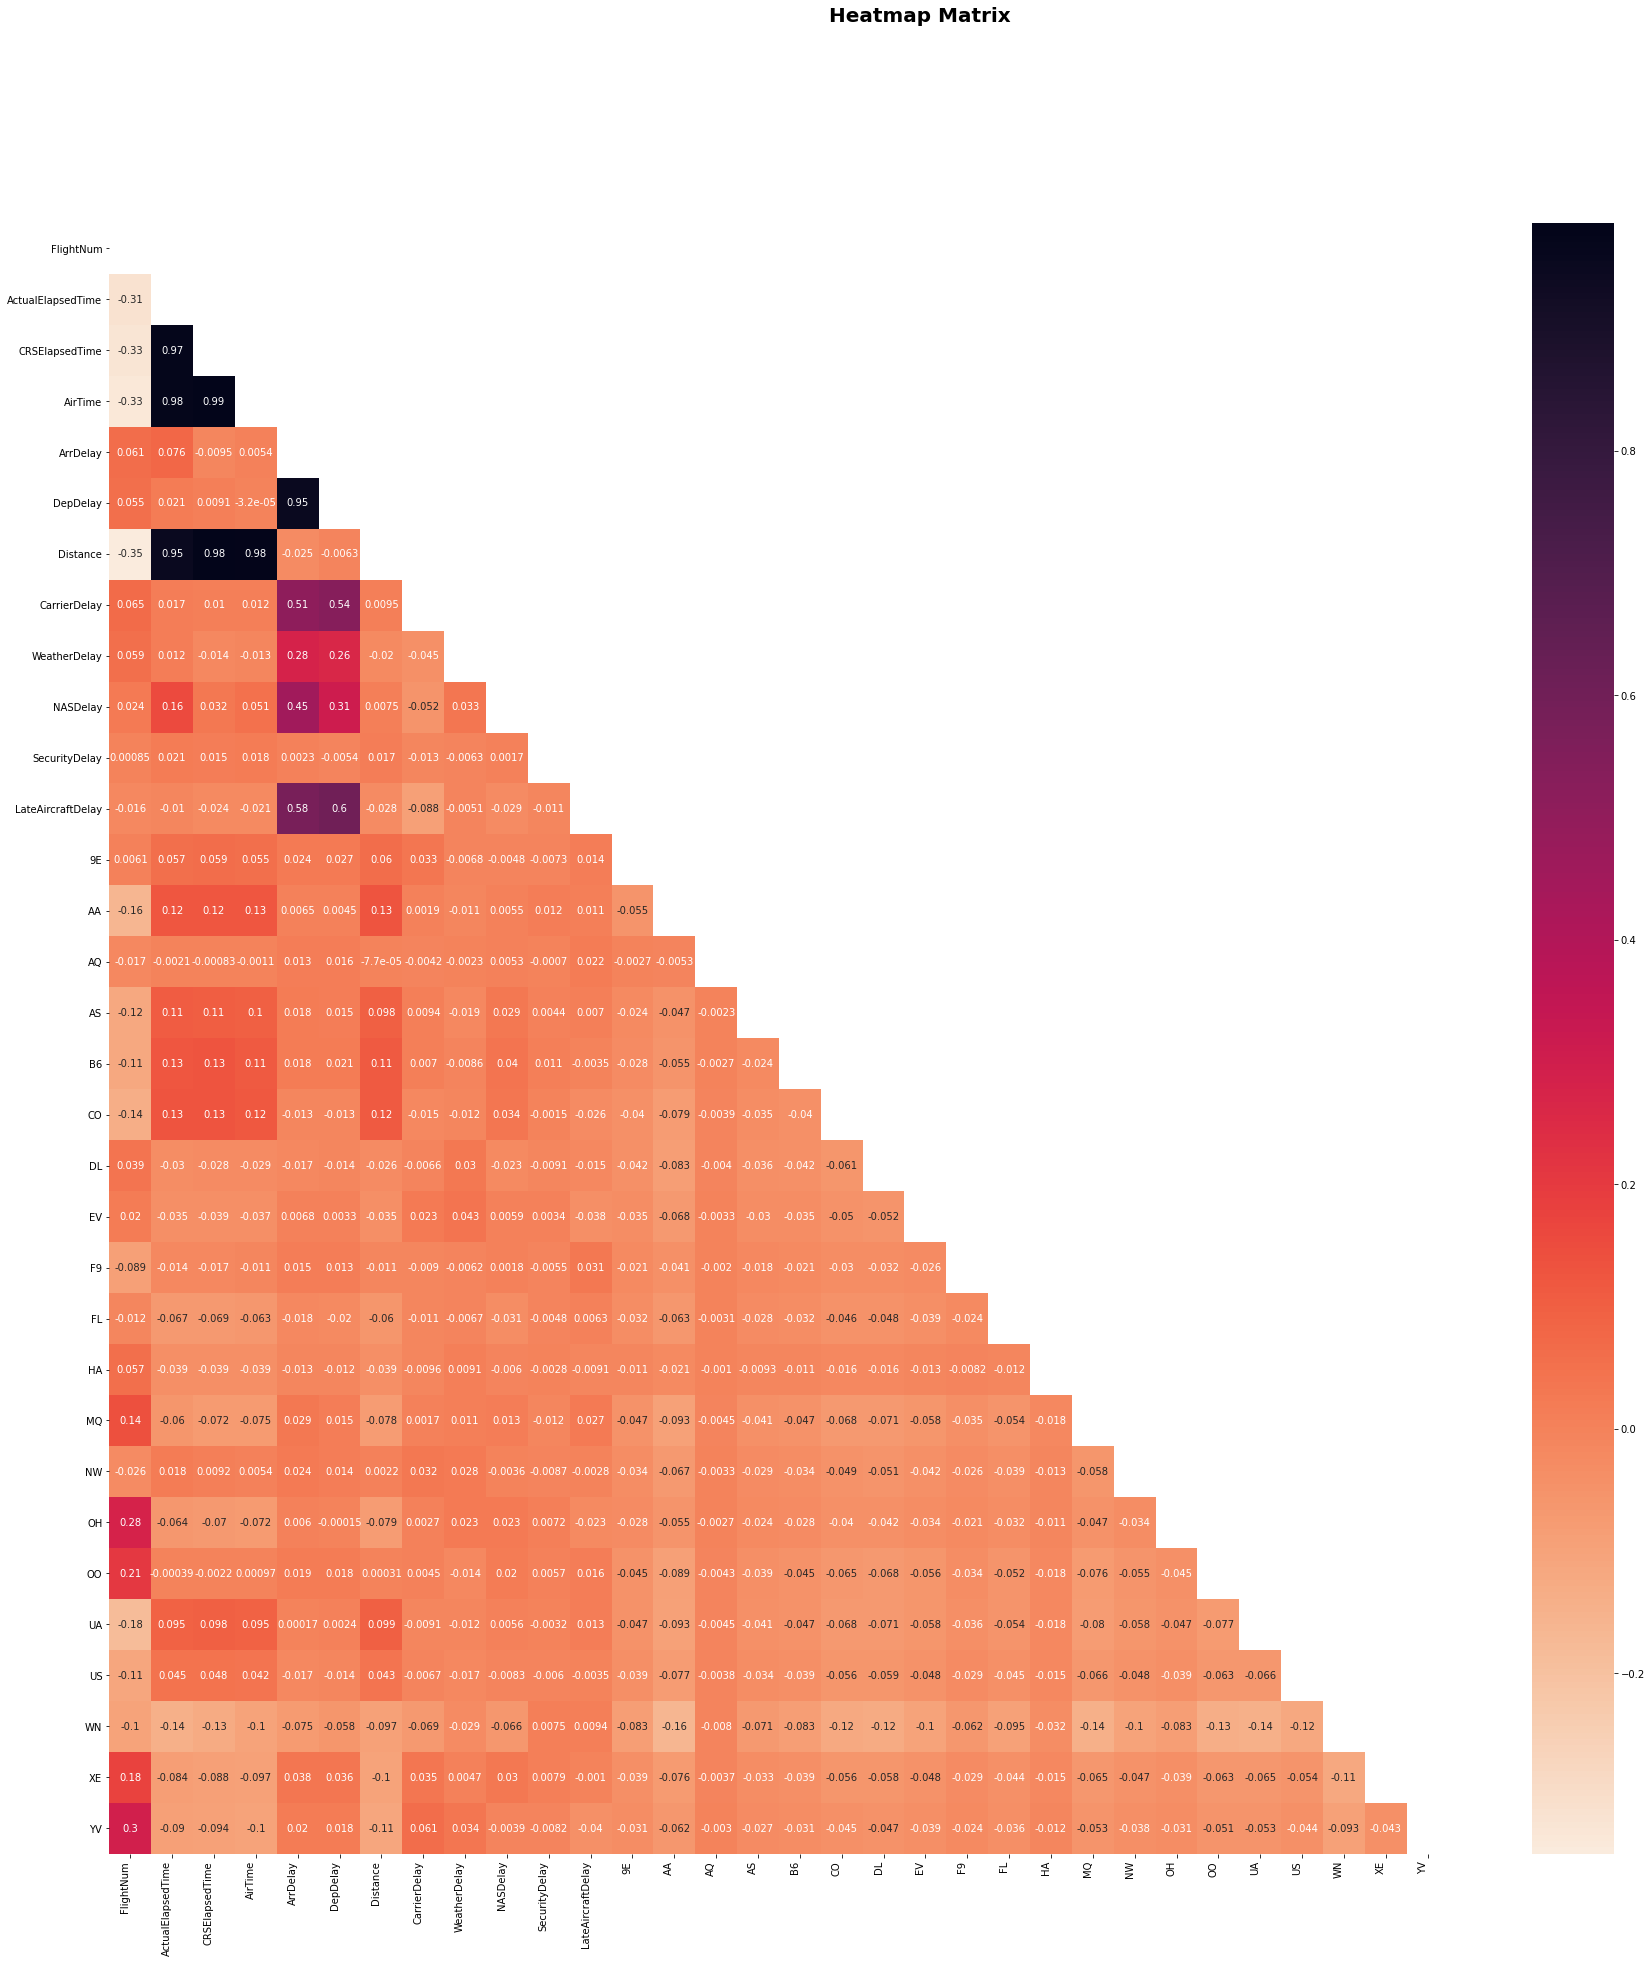

In [48]:
# Heatmap Matrix (numerical variables)

fig, ax = plt.subplots(figsize=(30, 30))

# Data
correlation_matrix= airlines_df_sample.select_dtypes(include=['float64', 'uint8']).corr(method='pearson')
one_half_matrix = np.triu(correlation_matrix)

# Heatmap Matrix
sns.heatmap(correlation_matrix, annot=True, mask = one_half_matrix, cmap=sns.color_palette("rocket_r", as_cmap=True),annot_kws = {"size": 10})
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90,horizontalalignment = 'right',)
ax.set_yticklabels(ax.get_yticklabels(),rotation = 0,horizontalalignment = 'right',)
ax.tick_params(labelsize = 10)
fig.suptitle('Heatmap Matrix', fontsize = 20, fontweight = "bold")
plt.show()

+ We can see how most variables have a very vague relationship between them, but there are a few variables that have a relationship:

     + Variable **DepTime** is closely related to **ArrTime**, that means that there is a relationship between the departure time of the planes with their arrival.


     + The **Distance** variable is also closely related to **ActualElapsedTime**, **CRSElapsedTime** and **AirTime**, that is because the distance an aircraft travels is intrinsically related to the actual and programmed elapsed time that an airplane performs, in addition, the flight time is also closely related, since the greater the distance, the greater the flight time and, vice versa.
    
    
     + **ActualElapsedTime**, **CRSElapsedTime** and **AirTime** are variables that are closely related to each other, since they are the minutes assigned to each flight (observation).

#### **DUMMIES VARIABLES PLOT**

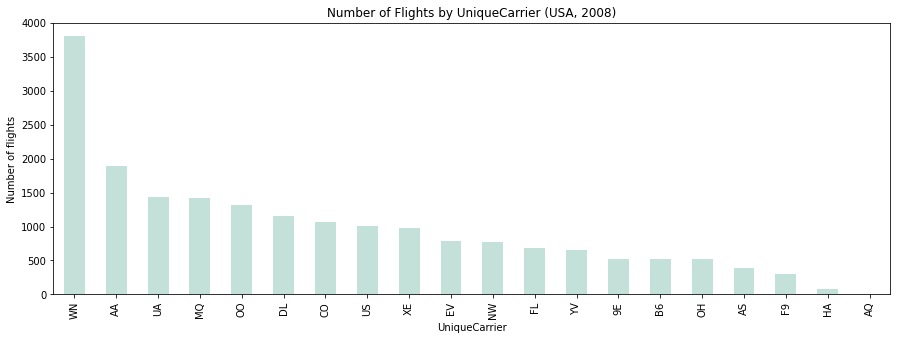

In [49]:
# Dummies Variables plot

# Data 
labels = ['9E', 'AA', 'AQ', 'AS', 'B6', 'CO', 'DL', 'EV', 'F9', 'FL', 'HA', 'MQ', 'NW', 'OH', 'OO', 'UA', 'US', 'WN', 'XE', 'YV']

# Sample plot
fig,ax  = plt.subplots(figsize = (15,5))
airlines_df_sample[labels].sum().sort_values(ascending=False).plot(kind='bar', alpha = 0.4, color='#69b3a2')
plt.ylabel('Number of flights')
plt.xlabel('UniqueCarrier')
plt.title('Number of Flights by UniqueCarrier (USA, 2008)')
plt.show()

#### **DATE VARIABLE**

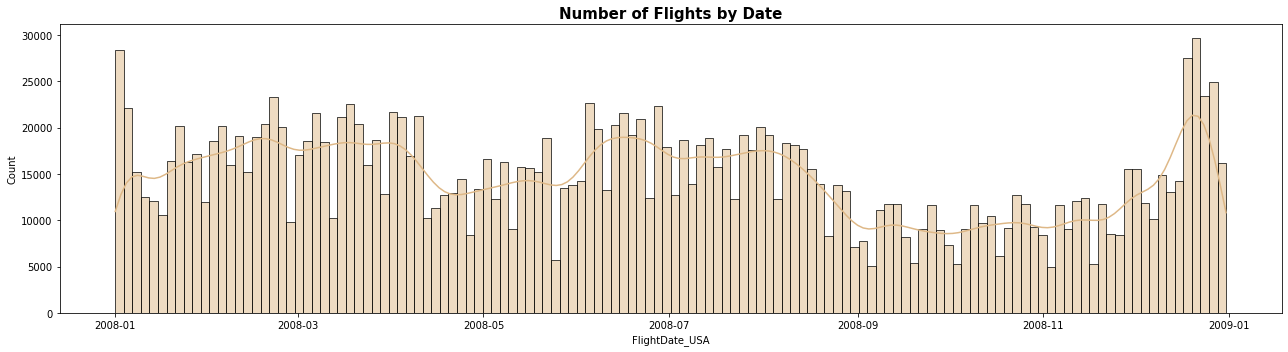

In [274]:
# Plot
fig, ax = plt.subplots(nrows = len([airlines_df['FlightDate_USA']]) , ncols= len([airlines_df['FlightDate_USA']]), figsize = (18,5))
sns.histplot(x = airlines_df['FlightDate_USA'], stat = 'count', kde=True, color = 'burlywood')
ax.set_title('Number of Flights by Date', fontsize = 15, fontweight ='bold')
plt.subplots_adjust(top = 0.9)
fig.tight_layout()
plt.show()

+ In this graph we show the flights that there are every day. We can see that in the holiday periods, such as January, July, August and December, there is a large volume of daily flights. On the contrary, in the months of September, October and November there are registred the lowest number of flights.

#### **DATETIME VARIABLES**

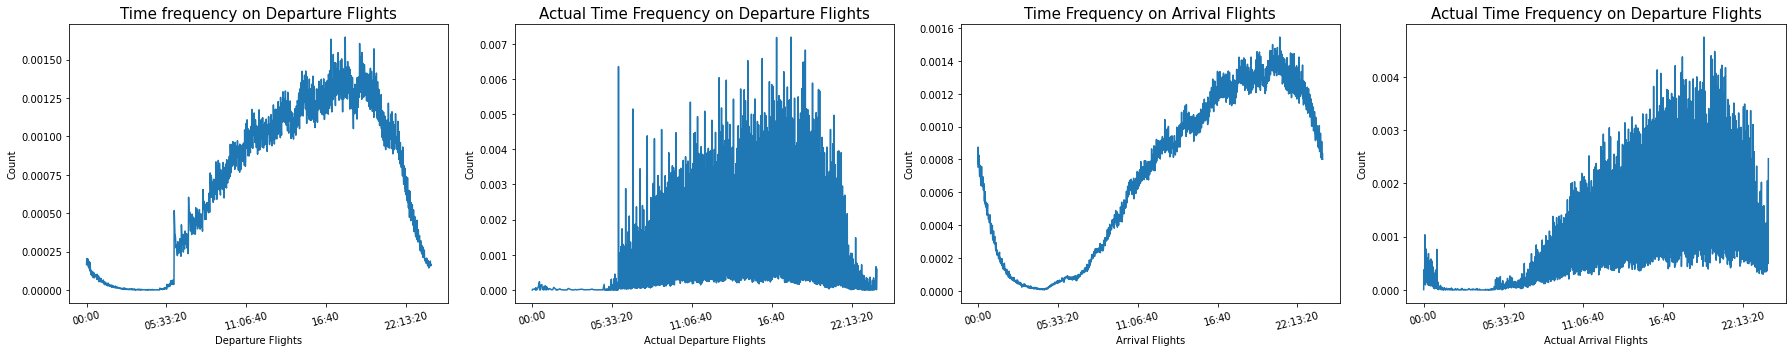

In [346]:
fig = plt.figure(figsize=(25,5))

# First plot
ax1 = fig.add_subplot(1,4,1)

ax1 = airlines_df['DepTime'].value_counts()/len(airlines_df['DepTime'])
ax1.plot()
plt.title(label = 'Time frequency on Departure Flights', fontsize = 15)
plt.xticks(rotation = 15)
plt.xlabel(xlabel='Departure Flights', fontsize= 10)
plt.ylabel(ylabel='Count', fontsize= 10)

# Second plot
ax2 = fig.add_subplot(1,4,2)

ax2 = airlines_df['CRSDepTime'].value_counts()/len(airlines_df['CRSDepTime'])
ax2.plot()
plt.title(label = 'Actual Time Frequency on Departure Flights', fontsize = 15)
plt.xticks(rotation = 15)
plt.xlabel(xlabel='Actual Departure Flights', fontsize= 10)
plt.ylabel(ylabel='Count', fontsize= 10)

# Third plot
ax3 = fig.add_subplot(1,4,3)

ax3 = airlines_df['ArrTime'].value_counts()/len(airlines_df['ArrTime'])
ax3.plot()
plt.title(label = 'Time Frequency on Arrival Flights', fontsize = 15)
plt.xticks(rotation = 15)
plt.xlabel(xlabel='Arrival Flights', fontsize= 10)
plt.ylabel(ylabel='Count', fontsize= 10)

# Third plot
ax4 = fig.add_subplot(1,4,4)

ax4 = airlines_df['CRSArrTime'].value_counts()/len(airlines_df['CRSArrTime'])
ax4.plot()
plt.title(label = 'Actual Time Frequency on Departure Flights', fontsize = 15)
plt.xticks(rotation = 15)
plt.xlabel(xlabel='Actual Arrival Flights', fontsize= 10)
plt.ylabel(ylabel='Count', fontsize= 10)


plt.tight_layout()
plt.show()


**OBSERVATIONS:**

+ The first two graph shows us the hourly frequency of the departure of the planes from the airports, we can observe how the most frequent departure time is between [16:00-18:00], while between [00:00-05 :30], the frequency of flights is very low.

+ The last two graphs show the hourly frequency of the arrival of the planes at the airports, we can see that throughout the day the arrivals of planes at the airports gradually increase [5:30-22:00], while at from 00:00 the frequency is drastically reduced.

We can observe a delay effect, since the last planes leaving the airports arrive later at the arrival airports and therefore, the hours between departure and arrival are lengthened. In a few words, we can say that the operators who work with the last departure flights go home before the operators who work with the last arrival flights.